<h1>Clustering. K-Means<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Use the **KMeans algorythm** to divide the dataset into clusters.<br>
(Iris dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) 


With the *Elbow method* establish the best number of clusters and display with scatterplots the outcome of every potential distribiuton, highlighting the centroids.

### Step 1: Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Step 2: Creating and Visualizing the data

In [2]:
iris = load_iris()

In [3]:
X = iris.data                                                                                                     # Features

In [4]:
df = pd.DataFrame(X, columns = iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


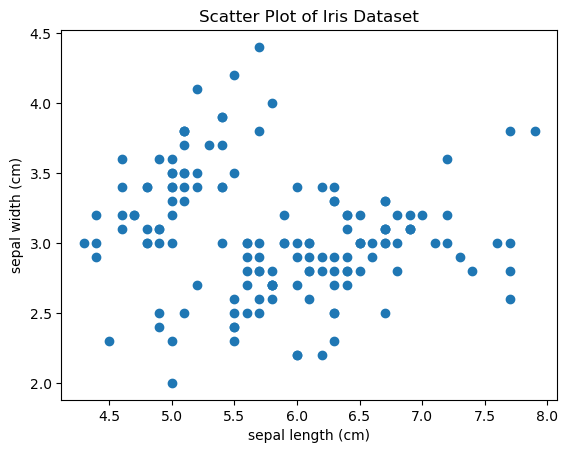

In [6]:
# Visualizing the data

plt.scatter(X[:, 0], X[:, 1])         # Use the first two features for the two-dimensional plot
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Scatter Plot of Iris Dataset')
plt.show()

From the above visualization, we can not see the optimal number of clusters.

### Step 3: Building clustering model, calculating values of Distortion and Inertia to pass them to the Elbow method

**Inertia**:
measures how internally coherent the clusters are, calculated as the sum of squared distances between each data point and its closest centroid. Lower inertia indicates tighter, more well-defined clusters. 

**Distortion**:
shows the quality of the clustering solution obtained by K-means, it shows how well the K-means algorithm has minimized the intra-cluster variation. In K-means, smaller values of distortion are desirable as they indicate that the algorithm has effectively minimized the within-cluster variation, resulting in more cohesive and well-separated clusters.

In [7]:
import mkl
mkl.set_num_threads(1)

8

In [8]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Step 4: Tabulating and Visualizing the Results
##### a) Using the different values of Distortion:

In [9]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.9440683605553906
2 : 0.8555777695266533
3 : 0.6480304904934434
4 : 0.5573847727333312
5 : 0.5096521951118286
6 : 0.4670733963396438
7 : 0.43569965442928493
8 : 0.41179438109735084
9 : 0.3947106465063558


#### Plot the graph of k vs WCSS

For every value of k, we calculate the within-cluster sum of squares (WCSS) value.

**WCSS** Is the sum of square distances between the centroids and each points.

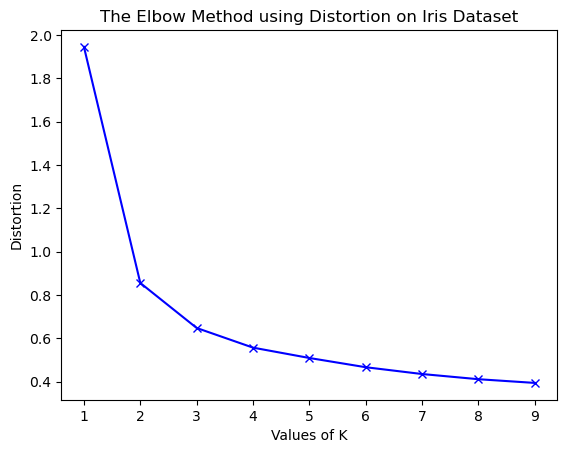

In [10]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion on Iris Dataset')
plt.show()

#### b) Using the different values of Inertia:

In [11]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 681.3706000000001
2 : 152.34795176035792
3 : 78.85144142614602
4 : 57.22847321428572
5 : 46.44618205128205
6 : 39.03998724608725
7 : 34.29971212121213
8 : 30.186555194805194
9 : 27.862911312371846


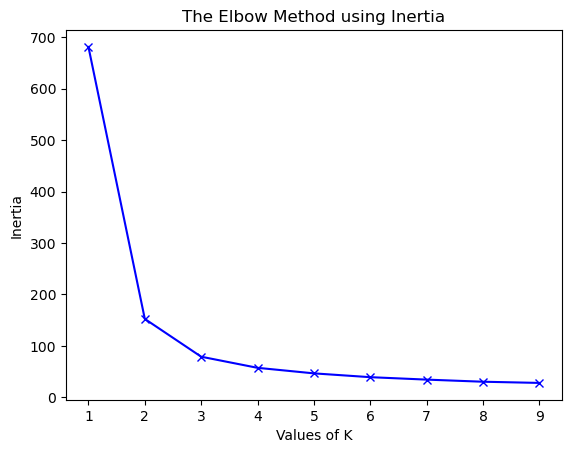

In [12]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

As seen from both plots, the optimal k value seems to be 3.

## Cluster distribution for different K values 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


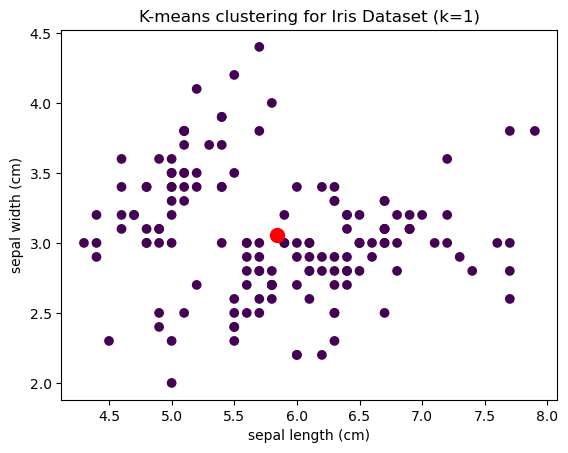

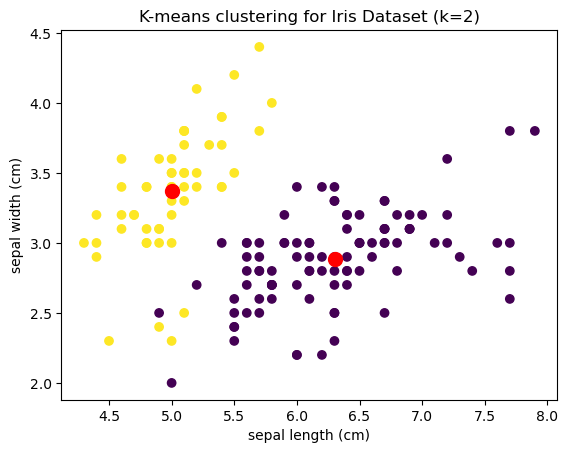

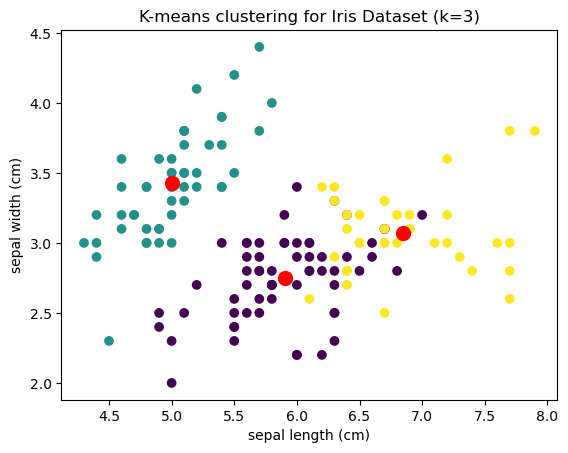

In [18]:
# Create a range of values for k
k_range = range(1, 4)
 
# Initialize an empty list to
# store the inertia values for each k
inertia_values = []
 
# Fit and plot the data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, \
                    init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],\
                kmeans.cluster_centers_[:, 1], \
                s=100, c='red')
    plt.title('K-means clustering for Iris Dataset (k={})'.format(k))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show();

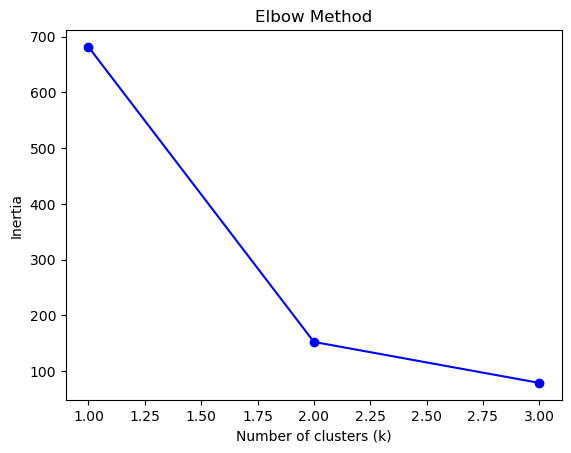

In [14]:
# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show();

In [15]:
# Get the cluster labels assigned to each data point
labels = kmeans.labels_

# Print the cluster labels
print("Cluster labels:")
print(labels)

Cluster labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
